# Processing sequences : Recurrent Neural Networks

They are used for time series predictions. Regular dense networks can also do it, and CNNs can also work for very long time series.
A recurrent neuron  receives an input *and* the output from the neuron at the previous time step. Because each neuron learns from the previous time step, it has *memory*; but these simple cells have relatively short memory (10 cells about).
RNNs take in a sequence and output a sequence.



In [96]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Synthetic data**

Let's create a synthetic time series

In [100]:
def generate_time_series(batch_size,n_steps):
    f1,f2,off1,off2=np.random.rand(4,batch_size,1)
    t = np.linspace(0,1,n_steps)
    y = 0.5*np.sin( (t-off1)*(f1*10+10) ) # first wave
    y += 0.5*np.sin( (t-off2)*(f2*20+20) ) # second wave
    y += 0.3* (np.random.rand(batch_size,n_steps)-0.5) # noise
    return y[...,np.newaxis].astype(np.float32) 
# here we added a dimension to the ouput time series because most ML algorithms can be multidimensional, but here we are just doing a single time series.

# we generate 10k time series of 51 points.
n_steps=50
y = generate_time_series(10000,n_steps+1)

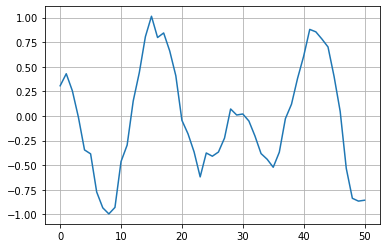

In [101]:
plt.plot(y[5000,:]);plt.grid(True)

**train-validation-test split**

In forecasting problem, we do not want to shuffle the training and test set since we want to make sure test is a prediction from the past (training).

The training data are time series of 50 points, the "label" or "model output" is the **last value** of the time series.

In [102]:
x_train,y_train = y[:7000,:n_steps],y[:7000,-1] 
x_val,y_val = y[7000:9000,:n_steps],y[7000:9000,-1] 
x_test,y_test = y[9000:,:n_steps],y[9000:,-1] 

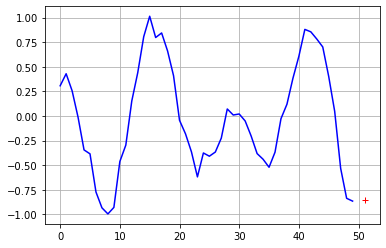

In [103]:
plt.plot(np.arange(n_steps),x_train[5000,:],'b')
plt.plot(51,y_train[5000],'r+')
plt.grid(True)

**Two baseline metrics**

We can use the past values to predict the state, called *naive forecasting*:
```python
y_pred=x_val[:,-1]
```

Or we can use a fully connected network and predict the value as a MLP regression:

```python
model.keras.models.Sequential([keras.layers.Flatten(input_shape=[50,1]),
                              keras.layers.Dense(1)])
```
They don't do too bad in this problem. The simple block is a ``simpleRNN``. The simplest recurrent neuron is a ``SimpleRNN(1,input_shape=[None,1])`` that takes any inout scalar since it can process any number of time steps. The default activation function is ``tanh``. To return a time series, and not its final output, you need to set ``return_sequences=True``. It turns out that the simplest and single recurrent neuron won't work. So we stack several simpleRNNs.

In [104]:
model=keras.models.Sequential([
    keras.layers.SimpleRNN(20,input_shape=[None,1],return_sequences=True),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)
    ])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_31 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_32 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
simple_rnn_33 (SimpleRNN)    (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20, batch_size=128) 

Epoch 1/20
55/55 [==============================] - 3s 29ms/step - loss: 0.2820 - mse: 0.2820 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 2/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 3/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0294 - val_mse: 0.0294
Epoch 4/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 5/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 6/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 7/20
55/55 [==============================] - 1s 23ms/step - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 8/20
55/55 [==============================] - 1s 24ms/step - loss: 0.0247 - m

Text(0.5, 0, 'epochs')

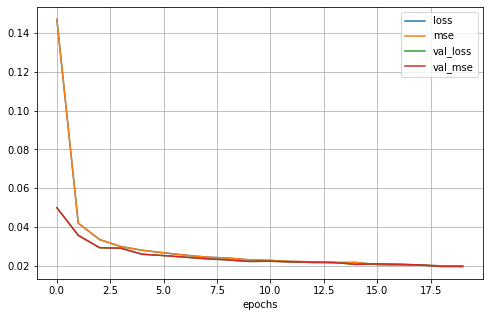

In [106]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('epochs')

In [42]:
model=keras.models.Sequential([
    keras.layers.SimpleRNN(20,input_shape=[None,1],return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
    ])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20, batch_size=128) 

Epoch 1/20
55/55 [==============================] - 2s 26ms/step - loss: 0.1676 - mse: 0.1676 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 2/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 3/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 4/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 7/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8/20
55/55 [==============================] - 1s 15ms/step - loss: 0.0045 - m

Text(0.5, 0, 'epochs')

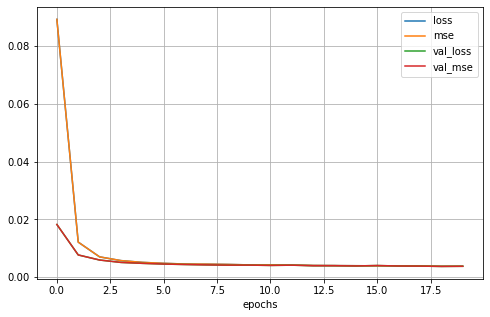

In [44]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('epochs')

## Forecast of several steps ahead: how far can you predict the future?
We will try and predict 10 steps ahead. The early part of the forecast will be a lot better than the later part of the forecast as uncertainties increase.

In [107]:
# we generate 10k time series of 51 points.
n_steps=50
x = generate_time_series(10000,n_steps+10)
y=np.empty((10000,n_steps,10))
for step_ahead in range(1,10+1):
    y[:,:,step_ahead-1]=x[:,step_ahead:step_ahead+n_steps,0]

    
x_train=x[:7000,:n_steps]
x_val=x[7000:9000,:n_steps]
x_test=x[9000:,:n_steps]

y_train=y[:7000]
y_val=y[7000:9000]
y_test=y[9000:]


In [109]:
model=keras.models.Sequential([
    keras.layers.SimpleRNN(20,input_shape=[None,1],return_sequences=True),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_36 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_37 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 10)          210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20, batch_size=128) 

Epoch 1/20
55/55 [==============================] - 2s 21ms/step - loss: 0.3744 - mse: 0.3744 - val_loss: 0.1668 - val_mse: 0.1668
Epoch 2/20
55/55 [==============================] - 1s 17ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 3/20
55/55 [==============================] - 1s 16ms/step - loss: 0.1353 - mse: 0.1353 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 4/20
55/55 [==============================] - 1s 17ms/step - loss: 0.1246 - mse: 0.1246 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 5/20
55/55 [==============================] - 1s 17ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.1175 - val_mse: 0.1175
Epoch 6/20
55/55 [==============================] - 1s 16ms/step - loss: 0.1170 - mse: 0.1170 - val_loss: 0.1142 - val_mse: 0.1142
Epoch 7/20
55/55 [==============================] - 1s 17ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1122 - val_mse: 0.1122
Epoch 8/20
55/55 [==============================] - 1s 18ms/step - loss: 0.1111 - m

In [112]:
y_pred=model.predict(x_test)
print(y_pred.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 50, 10)
(1000, 50, 1)
(1000, 50, 10)


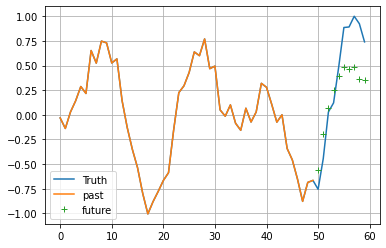

In [113]:
plt.plot(np.arange(n_steps+10),x[9000,:])
plt.plot(np.arange(n_steps),x_test[0,:])
plt.plot(np.arange(10)+n_steps,y_pred[0,-1,:],'+')
plt.legend(('Truth','past','future'))
plt.grid(True)

## Problems with RNNs and solutions

unstable gradients, requires regularization and normalizations

### 2. LSTM
Long-Short Term Memory are (somewhat complicated) cells that aims to solve the memory loss issue.

<img src="lstm.png" alt="lstm" style="width: 400px;"/>



In [114]:
model=keras.models.Sequential([
    keras.layers.LSTM(20,input_shape=[None,1],return_sequences=True),
    keras.layers.LSTM(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
    ])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 20)          1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 10)          210       
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=20, batch_size=128) 

Epoch 1/20
55/55 [==============================] - 5s 49ms/step - loss: 0.2473 - mse: 0.2473 - val_loss: 0.2019 - val_mse: 0.2019
Epoch 2/20
55/55 [==============================] - 2s 39ms/step - loss: 0.1971 - mse: 0.1971 - val_loss: 0.1814 - val_mse: 0.1814
Epoch 3/20
55/55 [==============================] - 2s 39ms/step - loss: 0.1743 - mse: 0.1743 - val_loss: 0.1558 - val_mse: 0.1558
Epoch 4/20
55/55 [==============================] - 2s 39ms/step - loss: 0.1470 - mse: 0.1470 - val_loss: 0.1286 - val_mse: 0.1286
Epoch 5/20
55/55 [==============================] - 2s 39ms/step - loss: 0.1243 - mse: 0.1243 - val_loss: 0.1166 - val_mse: 0.1166
Epoch 6/20
55/55 [==============================] - 2s 38ms/step - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 7/20
55/55 [==============================] - 2s 38ms/step - loss: 0.1095 - mse: 0.1095 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 8/20
55/55 [==============================] - 2s 38ms/step - loss: 0.1051 - m

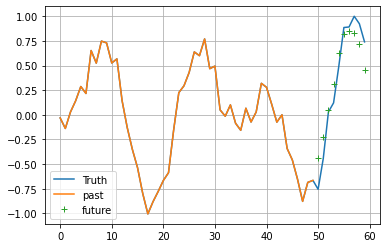

In [116]:
y_pred=model.predict(x_test)
plt.plot(np.arange(n_steps+10),x[9000,:])
plt.plot(np.arange(n_steps),x_test[0,:])
plt.plot(np.arange(10)+n_steps,y_pred[0,-1,:],'+')
plt.legend(('Truth','past','future'))
plt.grid(True)